In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

['monkey_labels.txt', 'validation', 'training']


In [15]:
np.random.seed(95)
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D
train_datagen = image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

valid_datagen = image.ImageDataGenerator(rescale=1./255)

batch_size=40

train_generator = train_datagen.flow_from_directory(
        '../input/training/training',
        batch_size=batch_size,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '../input/validation/validation',
        batch_size=batch_size,
        class_mode='categorical')


model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(None,None,3)))
model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(GlobalMaxPooling2D())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit_generator(
        train_generator,
        steps_per_epoch=1098 // batch_size,
        epochs=100,
        validation_data=valid_generator,
        validation_steps=272 // batch_size)

Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Epoch 1/100
27/27 [==============================] - 59s 2s/step - loss: 2.2922 - acc: 0.1257 - val_loss: 2.2314 - val_acc: 0.1500
Epoch 2/100
27/27 [==============================] - 56s 2s/step - loss: 2.1794 - acc: 0.1726 - val_loss: 2.1427 - val_acc: 0.2042
Epoch 3/100
27/27 [==============================] - 56s 2s/step - loss: 2.0267 - acc: 0.2284 - val_loss: 1.9218 - val_acc: 0.2333
Epoch 4/100
27/27 [==============================] - 56s 2s/step - loss: 1.7602 - acc: 0.3226 - val_loss: 1.8304 - val_acc: 0.3333
Epoch 5/100
27/27 [==============================] - 55s 2s/step - loss: 1.7059 - acc: 0.3464 - val_loss: 1.6732 - val_acc: 0.3417
Epoch 6/100
27/27 [==============================] - 54s 2s/step - loss: 1.5775 - acc: 0.3792 - val_loss: 1.6121 - val_acc: 0.4167
Epoch 7/100
27/27 [==============================] - 56s 2s/step - loss: 1.4260 - acc: 0.4674 - val_loss: 1.4888 - val_acc: 0.470

27/27 [==============================] - 54s 2s/step - loss: 0.3139 - acc: 0.8833 - val_loss: 0.9921 - val_acc: 0.7500
Epoch 63/100
27/27 [==============================] - 55s 2s/step - loss: 0.2952 - acc: 0.8870 - val_loss: 0.8010 - val_acc: 0.7917
Epoch 64/100
27/27 [==============================] - 53s 2s/step - loss: 0.2436 - acc: 0.9052 - val_loss: 0.8476 - val_acc: 0.7875
Epoch 65/100
27/27 [==============================] - 52s 2s/step - loss: 0.1992 - acc: 0.9404 - val_loss: 1.2477 - val_acc: 0.7375
Epoch 66/100
27/27 [==============================] - 52s 2s/step - loss: 0.2947 - acc: 0.8932 - val_loss: 0.8621 - val_acc: 0.7792
Epoch 67/100
27/27 [==============================] - 53s 2s/step - loss: 0.3038 - acc: 0.8830 - val_loss: 0.9169 - val_acc: 0.7583
Epoch 68/100
27/27 [==============================] - 56s 2s/step - loss: 0.2292 - acc: 0.9102 - val_loss: 0.9537 - val_acc: 0.7542
Epoch 69/100
27/27 [==============================] - 54s 2s/step - loss: 0.2498 - acc: 0

In [22]:
model.save('to_fine_tune.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, None, None, 32)    896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, None, None, 32)    9248      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, None, None, 64)    36928     
_________________________________________________________________
global_max_pooling2d_5 (Glob (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
__________

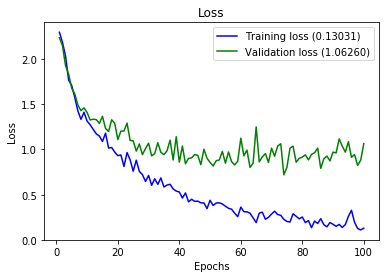

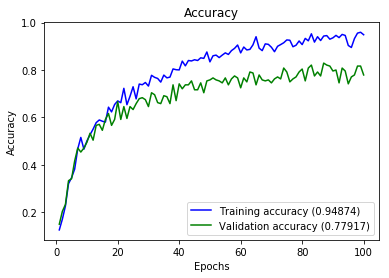

In [21]:
model.summary()
from matplotlib import pyplot as plt
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(hist)

<class 'NoneType'>


AttributeError: 'Image' object has no attribute 'display'